In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
%matplotlib notebook

In [57]:
ant_fn = r"d:\Peacock\MTData\MB\mb28\Merged\sensors\mb28_20160726_230018_409602Hx2264.rsp"

with open(ant_fn, 'r') as fid:
    lines = fid.readlines()
    
ant_arr = np.zeros((3, len(lines)-2))
ii = 0
for line in lines:
    line_list = line.strip().split()
    if len(line_list) < 3:
        pass
    elif '//' in line:
        pass
    else:
        ant_arr[0, ii] = float(line_list[0])
        ant_arr[1, ii] = float(line_list[1])
        ant_arr[2, ii] = float(line_list[2])
        ii += 1
        

In [67]:
new_ant_fn = r"D:\Peacock\MTData\Ant_calibrations\ant_2284.csv"
new_ant_arr = np.loadtxt(new_ant_fn, delimiter=',',
                         dtype={'names':('frequency', 'real', 'imag'),
                                        'formats':(np.float, np.float, np.float)})

In [74]:
real_func = interpolate.interp1d(new_ant_arr['frequency'], new_ant_arr['real']/100, kind='slinear')
imag_func = interpolate.interp1d(new_ant_arr['frequency'], new_ant_arr['imag']/100, kind='slinear')

f = ant_arr[0][np.where((ant_arr[0]>=new_ant_arr['frequency'].min()) & (ant_arr[0]<=new_ant_arr['frequency'].max()))]
real = real_func(f)
imag = imag_func(f)

<IPython.core.display.Javascript object>


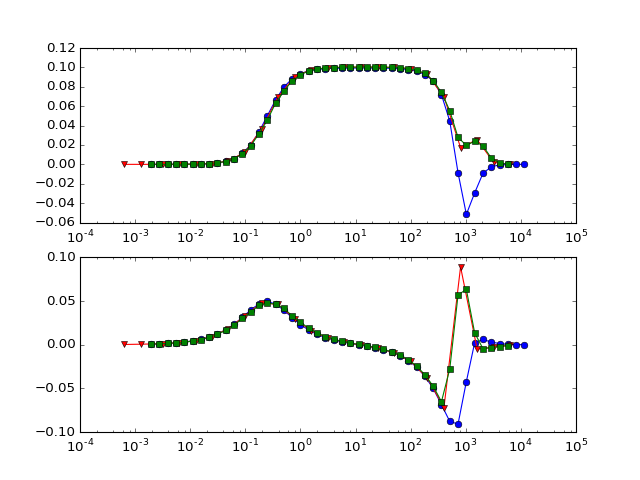

In [75]:
fig = plt.figure(1)
ax_re = fig.add_subplot(2, 1, 1)
ax_im = fig.add_subplot(2, 1, 2, sharex=ax_re)

ax_re.semilogx(ant_arr[0], ant_arr[1], marker='o', color='b')
ax_im.semilogx(ant_arr[0], ant_arr[2], marker='o', color='b')

ax_re.semilogx(new_ant_arr['frequency'], new_ant_arr['real']/100, marker='v', color='r')
ax_im.semilogx(new_ant_arr['frequency'], new_ant_arr['imag']/100, marker='v', color='r')

ax_re.semilogx(f, real, marker='s', color='g')
ax_im.semilogx(f, imag, marker='s', color='g')


In [84]:
lines = ['{0:.5e},{1:.5e},{2:.5e}'.format(ant_arr[0, ii], 
                                          ant_arr[1, ii]*100, 
                                          ant_arr[2, ii]*100)
         for ii in range(ant_arr.shape[1])]

for ant in [2254, 2264, 2274, 2284, 2294, 2304, 2314, 2324, 2334, 2344, 2844, 2854]:
    with open(r"d:\Peacock\MTData\Ant_calibrations\rsp_cal\ant_{0:.0f}.csv".format(ant), 'w') as fid:
        fid.write('\n'.join(lines))

In [81]:
100/np.pi/2

15.915494309189533